# 2019/02/12    - test campaign 2, day 2
##   4.3 Optimize M1-M3-M1 figure with new forces (6 iterations, set4 M1 only)
##   4.4 Optimize M1-M3-M1 figure with new quad forces (6 iterations, set4 M1 only)

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190212

<Figure size 432x288 with 0 Axes>

### Continue the M1-M3-M1 optimization, using forces calculated over the recess (see Sec4.3InitialForces.ipynb).
Note that we repositioned the mirror before these measurements, using results from Sec4.3InitialForces.ipynb

##### These are without additional quad forces

4-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190212_4-3/M1 set0 190212 4-3.h5: Tue Feb 12 09:07:06 2019 
/Processed/190212_4-3/M3 set0 190212 4-3.h5: Tue Feb 12 09:08:51 2019 
4-3 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190212_4-3/M1 set1 190212 4-3.h5: Tue Feb 12 09:38:41 2019 
/Processed/190212_4-3/M3 set1 190212 4-3.h5: Tue Feb 12 09:40:08 2019 
4-3 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190212_4-3/M1 set2 190212 4-3.h5: Tue Feb 12 10:04:43 2019 
/Processed/190212_4-3/M3 set2 190212 4-3.h5: Tue Feb 12 10:04:55 2019 
4-3 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190212_4-3/M1 set3 190212 4-3.h5: Tue Feb 12 10:27:12 2019 
/Processed/190212_4-3/M3 set3 190212 4-3.h5: Tue Feb 12 10:27:34 2019 
4-3 bend4 ------ irow = 1, icol = 1, -----------------------------
/Processed/190212_4-3/M1 set4 190212 4-3.h5: Tue Feb 12 10:46:37 2019 
4-3 bend5 ------ irow = 1,

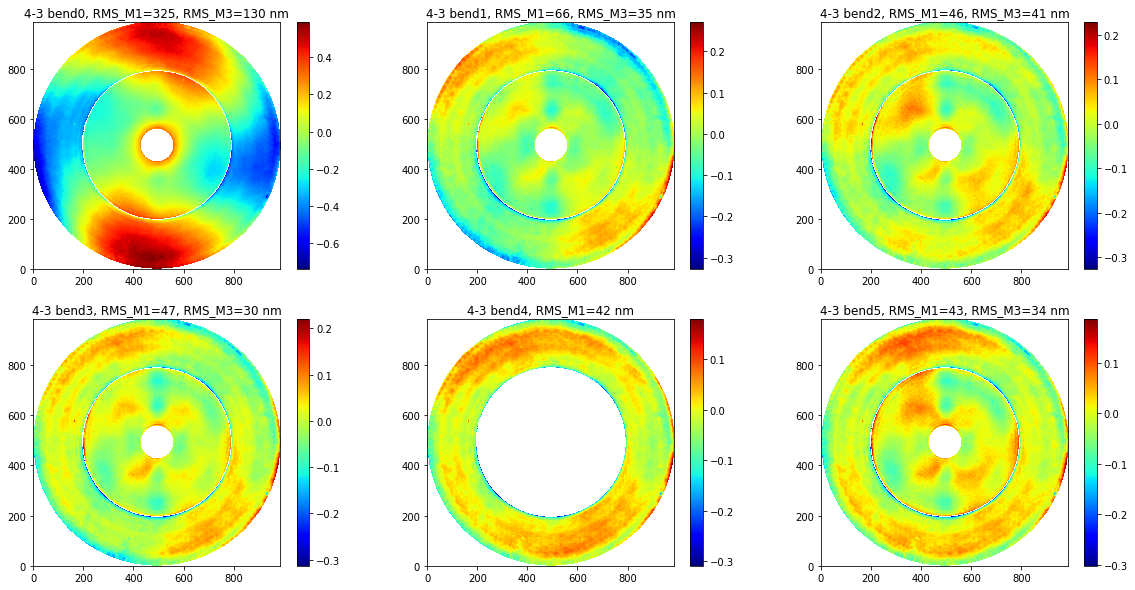

In [2]:
testID = '4-3'
iter = ''
fig, ax = plt.subplots(2,3,figsize=(20,5*2))
i = 0
for bend in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(s, origin='lowerleft')  
        ax[irow][icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[irow][icol])

#fig.delaxes(ax.flatten()[-1])    

/Users/bxin/largeData/M1M3_ML/Processed/190212_4-3/M1M3 set0 190212 4-3M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-3/M1M3 set1 190212 4-3M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-3/M1M3 set2 190212 4-3M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-3/M1M3 set3 190212 4-3M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-3/M1 set4 190212 4-3 -FC fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-3/M1M3 set5 190212 4-3M1M3 fit mode amps.csv


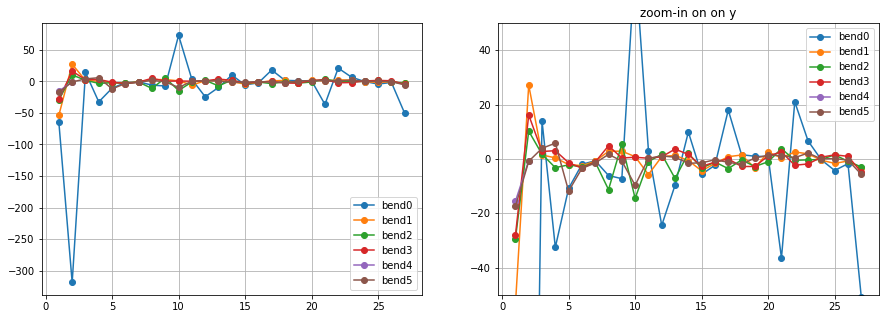

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(6):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])

### Continue the M1-M3-M1 optimization. Now with additional quad forces on top of the newly calculated forces
350N on the outer quads, 300N on the inner quads

4-4 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190212_4-4/M1 set0 190212 4-4.h5: Tue Feb 12 12:41:38 2019 
/Processed/190212_4-4/M3 set0 190212 4-4.h5: Tue Feb 12 12:41:07 2019 
4-4 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190212_4-4/M1 set1 190212 4-4.h5: Tue Feb 12 13:04:07 2019 
/Processed/190212_4-4/M3 set1 190212 4-4.h5: Tue Feb 12 13:04:32 2019 
4-4 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190212_4-4/M1 set2 190212 4-4.h5: Tue Feb 12 13:29:29 2019 
/Processed/190212_4-4/M3 set2 190212 4-4.h5: Tue Feb 12 13:29:39 2019 
4-4 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190212_4-4/M1 set3 190212 4-4.h5: Tue Feb 12 13:52:46 2019 
/Processed/190212_4-4/M3 set3 190212 4-4.h5: Tue Feb 12 13:53:01 2019 
4-4 bend4 ------ irow = 1, icol = 1, -----------------------------
/Processed/190212_4-4/M1 set4 190212 4-4.h5: Tue Feb 12 14:11:30 2019 
4-4 bend5 ------ irow = 1,

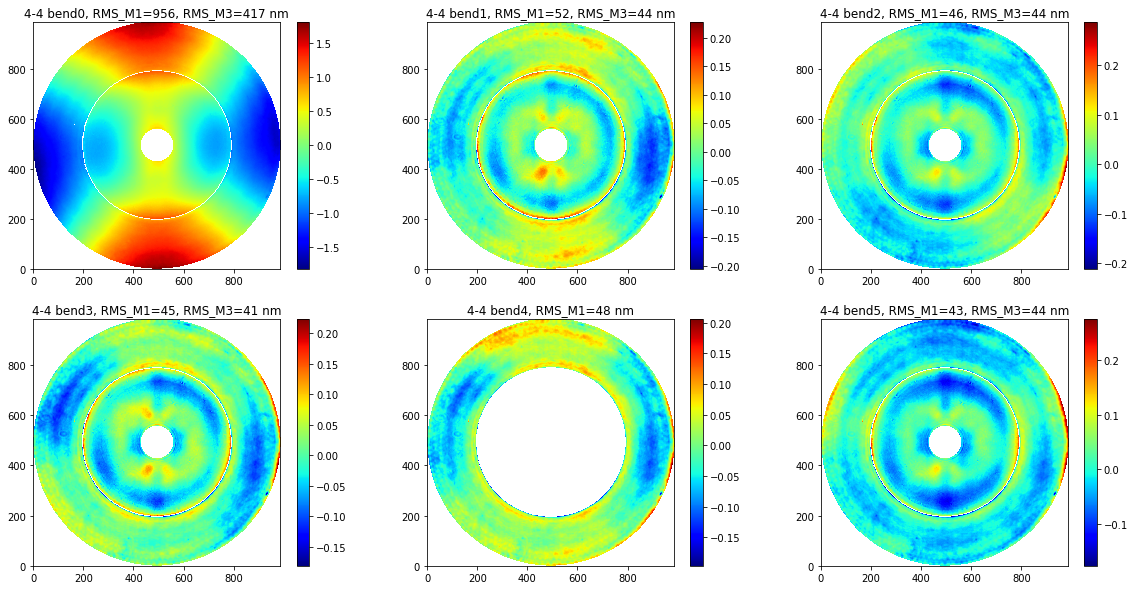

In [4]:
testID = '4-4'
iter = ''
fig, ax = plt.subplots(2,3,figsize=(20,5*2))
i = 0
for bend in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(s, origin='lowerleft')  
        ax[irow][icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[irow][icol])

#fig.delaxes(ax.flatten()[-1])    

/Users/bxin/largeData/M1M3_ML/Processed/190212_4-4/M1M3 set0 190212 4-4M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-4/M1M3 set1 190212 4-4M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-4/M1M3 set2 190212 4-4M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-4/M1M3 set3 190212 4-4M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-4/M1 set4 190212 4-4 -FC fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-4/M1M3 set5 190212 4-4M1M3 fit mode amps.csv


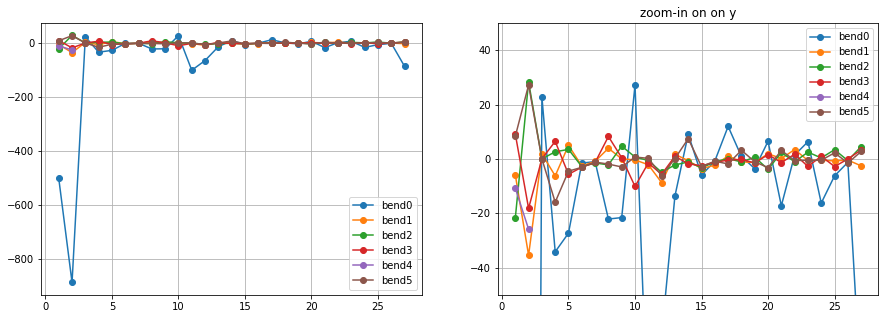

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(6):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])

### If we have optimized M1M3 using 153 bending modes, the high spatial frequence pattern is still present

4-4 bend5 ------ irow = 0, icol = 0, -----------------------------
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-4 153 Modes/M1M3 set5 190212 4-4M1M3 fit -153modes.h5
/Processed/190212_4-4 153 Modes/M1M3 set5 190212 4-4M1M3 fit -153modes.h5: Tue Feb 12 14:26:48 2019 
/Processed/190212_4-4 153 Modes/M1M3 set5 190212 4-4M1M3 fit -153modes.h5: Tue Feb 12 14:26:58 2019 


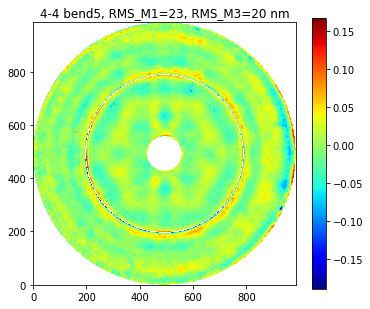

In [13]:
testID = '4-4'
iter = ' 153 Modes'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(5,6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    pattern = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit -153modes.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)
    fileset = sorted(glob.glob(pattern))
    print(pattern)
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])

fig.delaxes(ax.flatten()[-1])    
fig.delaxes(ax.flatten()[-2])   

/Users/bxin/largeData/M1M3_ML/Processed/190212_4-4 153 Modes/M1M3 set5 190212 4-4M1M3 fit mode amps.csv


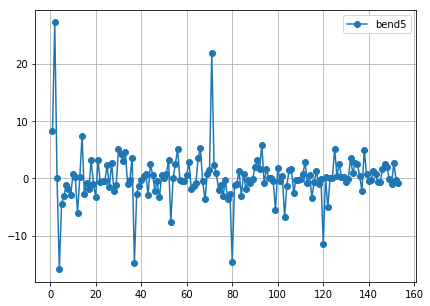

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(5,6):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

#### The Mirror Lab then tried the same optimizatin with 156 modes. This doesn't make sense. Bending modes 154,155,156 should be essentially all zeros. Because we only have 153 bending modes, with 156 actuators and 3 constraints: Fz=0, Mx=0, and My = 0.

4-4 bend5 ------ irow = 0, icol = 0, -----------------------------
/Users/bxin/largeData/M1M3_ML/Processed/190212_4-4 156 Modes/M1M3 set5 190212 4-4M1M3 fit -156modes.h5
/Processed/190212_4-4 156 Modes/M1M3 set5 190212 4-4M1M3 fit -156modes.h5: Tue Feb 12 14:26:48 2019 
/Processed/190212_4-4 156 Modes/M1M3 set5 190212 4-4M1M3 fit -156modes.h5: Tue Feb 12 14:26:58 2019 


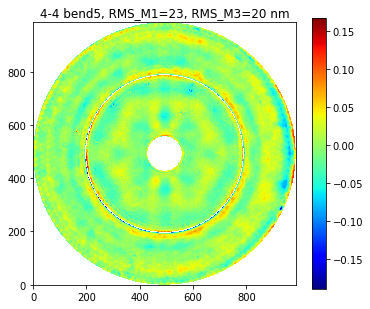

In [14]:
testID = '4-4'
iter = ' 156 Modes'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(5,6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    pattern = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit -156modes.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)
    fileset = sorted(glob.glob(pattern))
    print(pattern)
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])

fig.delaxes(ax.flatten()[-1])    
fig.delaxes(ax.flatten()[-2])   